In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [17]:
import numpy as np
import pandas as pd

In [18]:
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
newmodel = automap_base()

# reflect the tables
newmodel.prepare(engine, reflect =True)

In [22]:
# We can view all of the classes that automap found

newmodel.classes.keys()


['measurement', 'station']

In [23]:
# Save references to each table

measurement = newmodel.classes.measurement
station = newmodel.classes.station


In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database



In [27]:
lastdatetest = max(session.query(measurement.date))
print(lastdatetest)


('2017-08-23',)


In [28]:
type(lastdatetest)


sqlalchemy.util._collections.result

In [29]:
lastdate = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
lastdate


'2017-08-23'

In [30]:
type(lastdate)


str

In [31]:
lastdate.split('-')

['2017', '08', '23']

In [32]:
cleanlastdate = lastdate.split('-')
cleanlastdate

['2017', '08', '23']

In [33]:
lastdatefinal = dt.date(int(cleanlastdate[0]),int(cleanlastdate[1]),int(cleanlastdate[2]))
lastdatefinal


datetime.date(2017, 8, 23)

In [34]:
print(lastdatefinal)

2017-08-23


In [35]:
type(lastdatefinal)

datetime.date

In [36]:
yearbefore = lastdatefinal.year - 1
yearbefore


2016

In [37]:
startingdatefinal = dt.date(yearbefore, int(cleanlastdate[1]), int(cleanlastdate[2]))
startingdatefinal


datetime.date(2016, 8, 23)

In [38]:
print(startingdatefinal)

2016-08-23


In [39]:
# Perform a query to retrieve the data and precipitation scores

In [40]:
startingdatestr = str(startingdatefinal)
query = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= startingdatestr).all()

In [41]:
# Save the query results as a Pandas DataFrame and set the index to the date colum

In [42]:
measurement_df = pd.DataFrame(query)
measurement_df.head()

date  prcp
0  2016-08-23  0.00
1  2016-08-24  0.08
2  2016-08-25  0.08
3  2016-08-26  0.00
4  2016-08-27  0.00

In [43]:
# Sort the dataframe by date

In [44]:
measurement_df = measurement_df.set_index(measurement_df["date"])
measurement_df = measurement_df.sort_index()

measurement_df

date  prcp
date                        
2016-08-23  2016-08-23  0.00
2016-08-23  2016-08-23   NaN
2016-08-23  2016-08-23  1.79
2016-08-23  2016-08-23  0.05
2016-08-23  2016-08-23  0.15
...                ...   ...
2017-08-22  2017-08-22  0.00
2017-08-23  2017-08-23  0.00
2017-08-23  2017-08-23  0.00
2017-08-23  2017-08-23  0.08
2017-08-23  2017-08-23  0.45

[2230 rows x 2 columns]

In [45]:
# Use Pandas Plotting with Matplotlib to plot the data

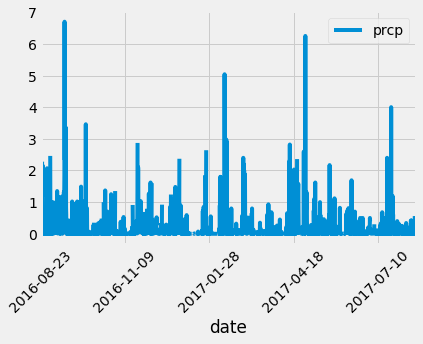

In [46]:

measurement_df.plot(rot =45)

In [47]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [48]:
measurement_df.describe()

prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

In [49]:
# Design a query to show how many stations are available in this dataset?


In [50]:
session.query(func.count(station.station)).all()

[(9)]

In [51]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [52]:
mostactivestations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

mostactivestations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

themostactivestations = session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs),\
              func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()
themostactivestations


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [63]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query12months = session.query(measurement.tobs).filter(measurement.date>=startingdatefinal).\
    filter(measurement.station == "USC00519281").all()

temperatures12months = pd.DataFrame(query12months)

temperatures12months.head(12)


tobs
0   77.0
1   77.0
2   80.0
3   80.0
4   75.0
5   73.0
6   78.0
7   77.0
8   78.0
9   80.0
10  80.0
11  78.0

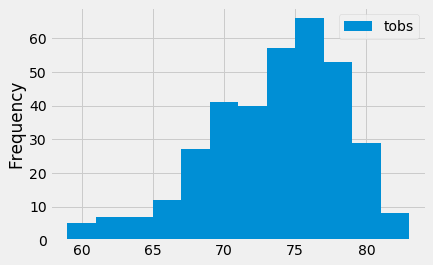

In [62]:
temperatures_df.plot.hist(bins=12)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
